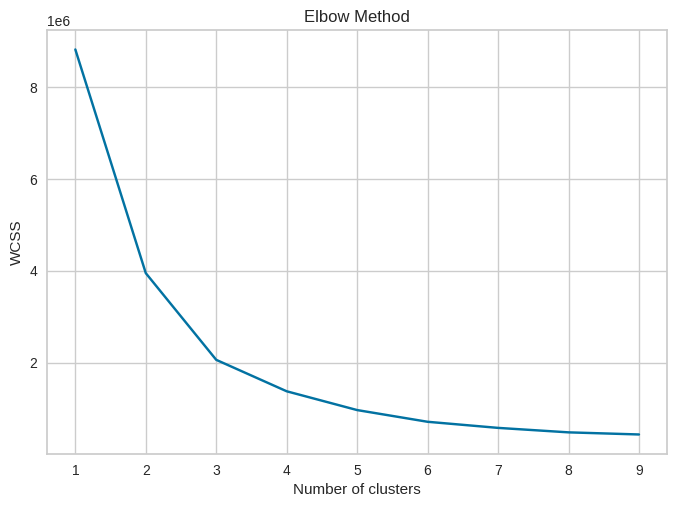

Elbow Method show the optimal clusters




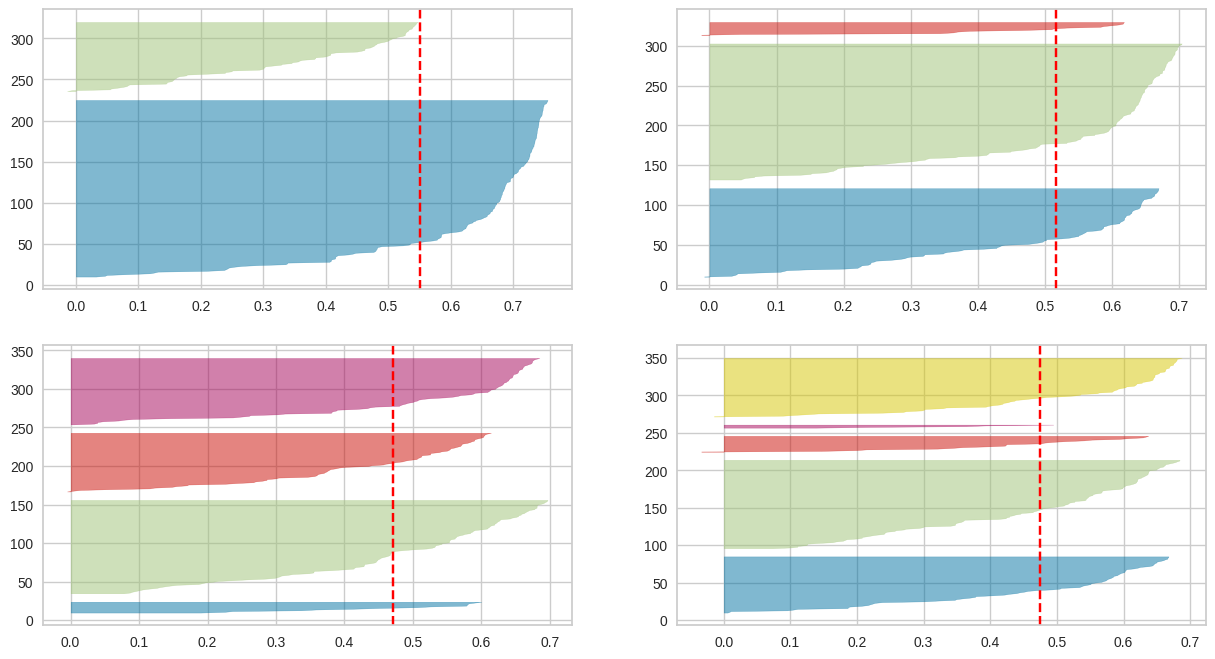

Silhouetter Score: 0.516




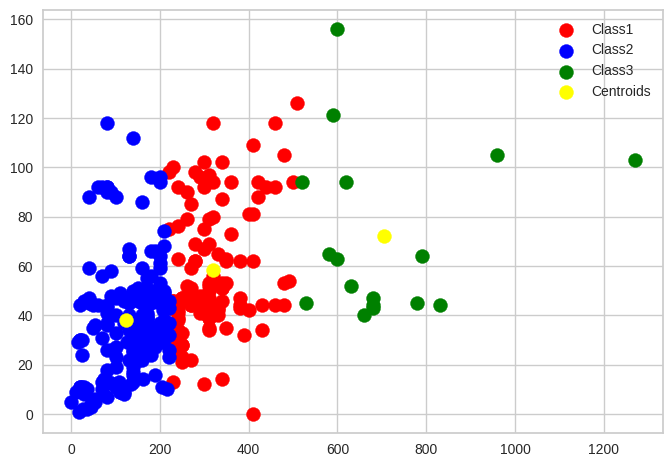

In [130]:
import pandas as pd  
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

dataset=pd.read_csv("https://raw.githubusercontent.com/phattarin-kitbumrung/machinelearning-python/dataset/main/fastfood.csv")
dataset=dataset.dropna()
x = dataset.drop(['restaurant', 'item', 'salad'], axis=1)
x = x.iloc[:, [1,7,8,9,10]]
x  = np.array(x)

# Finding the optimal number of clusters using Elbow Method
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
print('Elbow Method show the optimal clusters')
print("\n")

# Define the model
kmeans_model = KMeans(n_clusters=3, n_init=10, random_state=0)
# Fit into our dataset fit
kmeans_predict = kmeans_model.fit_predict(x)
dataset['cluster'] = kmeans_predict

# Create SilhouetteVisualizer
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x) 
plt.show()

# Calculate Silhoutte Score
score = silhouette_score(x, kmeans_model.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)
print("\n")

# Visualising the clusters
plt.scatter(x[kmeans_predict == 0, 0], x[kmeans_predict == 0, 1], s = 100, c = 'red', label = 'Class1')
plt.scatter(x[kmeans_predict == 1, 0], x[kmeans_predict == 1, 1], s = 100, c = 'blue', label = 'Class2')
plt.scatter(x[kmeans_predict == 2, 0], x[kmeans_predict == 2, 1], s = 100, c = 'green', label = 'Class3')
# Plotting the centroids of the clusters
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()
